In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.datasets import mnist
import cv2


import warnings
warnings.filterwarnings("ignore")

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
len(X_train[0])

28

In [4]:
X_train[0].shape

(28, 28)

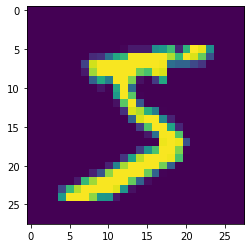

In [5]:
plt.imshow(X_train[0])

In [6]:
px.imshow(X_train[0], title=f"Number : {y_train[0]}")

In [7]:
X_train = X_train / 255
print(X_train.shape)
X_test = X_test / 255
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
encoding_dim = 32

input_img = Input(shape=(784, ))
input_layer1 = Dense(392, activation="relu")(input_img)
input_layer2 = Dense(196, activation="relu")(input_layer1)
input_layer3 = Dense(98 , activation="relu")(input_layer2)

mid_layer    = Dense(encoding_dim, activation="relu")(input_layer3)

output_layer1 = Dense(98 , activation="relu")(mid_layer)
output_layer2 = Dense(196, activation="relu")(output_layer1)
output_layer3 = Dense(392, activation="relu")(output_layer2)
output_layer4 = Dense(784, activation="sigmoid")(output_layer3)

auto_encoder = Model(input_img, output_layer4)

auto_encoder.compile(optimizer="adam", loss="binary_crossentropy")

In [11]:
ear_stop = EarlyStopping(monitor="loss", patience=20, verbose=1)
red_lr = ReduceLROnPlateau(monitor="loss", patience=10, verbose=1, factor=0.75, min_lr=1e-7)
ch_point = ModelCheckpoint(verbose=1, filepath=r"E:\Deap learning Courses\Level3 (Deep Learning)\DAY8 (CNN Transfer Learning)\model.h5")

In [12]:
auto_encoder.fit(X_train, X_train, epochs=600,
                validation_data=(X_test, X_test), 
                shuffle=True, batch_size=64,  
                callbacks = [red_lr ,ch_point ,ear_stop])

Epoch 1/600
929/938 [============================>.] - ETA: 0s - loss: 0.1584
Epoch 1: saving model to E:\Deap learning Courses\Level3 (Deep Learning)\DAY8 (CNN Transfer Learning)\model.h5
938/938 [==============================] - 8s 7ms/step - loss: 0.1580 - val_loss: 0.1166 - lr: 0.0010
Epoch 2/600
930/938 [============================>.] - ETA: 0s - loss: 0.1089
Epoch 2: saving model to E:\Deap learning Courses\Level3 (Deep Learning)\DAY8 (CNN Transfer Learning)\model.h5
938/938 [==============================] - 7s 7ms/step - loss: 0.1089 - val_loss: 0.1024 - lr: 0.0010
Epoch 3/600
924/938 [============================>.] - ETA: 0s - loss: 0.0992
Epoch 3: saving model to E:\Deap learning Courses\Level3 (Deep Learning)\DAY8 (CNN Transfer Learning)\model.h5
938/938 [==============================] - 5s 6ms/step - loss: 0.0992 - val_loss: 0.0957 - lr: 0.0010
Epoch 4/600
935/938 [============================>.] - ETA: 0s - loss: 0.0938
Epoch 4: saving model to E:\Deap learning Courses

In [13]:
save_model(auto_encoder, "full_model.h5")

In [14]:
# auto_encoder.predict(X_train[0])

# New Section

In [15]:
X_train[0].shape

(784,)

In [16]:
encoder = Model(input_img, mid_layer)
save_model(encoder, "encoder.h5")

In [17]:
decoder = Model(mid_layer, output_layer4)
save_model(decoder, "decoder.h5")

In [18]:
def show_encoding_img(X_test, n):
    img = encoder.predict(X_test)
    a = np.array([0, 0, 0, 0])

    new_img = np.concatenate([img[n], a])
    return px.imshow(new_img.reshape(6, 6))

In [19]:
show_encoding_img(X_test, 0)

313/313 [==============================] - 1s 1ms/step


In [20]:
img = decoder.predict(encoder.predict(X_test))

px.imshow(img[0].reshape(28, 28))

313/313 [==============================] - 0s 1ms/step
